# Finding subpatterns in numbers

We attempt to find subpatterns in numbers. Say we are given 100 numbers like '123xyz'. Our task is to find the pattern which dictates the generation of such numbers.

## We generate some dummy data to work on

In [127]:
import pandas as pd
import seaborn as sns
import random
%matplotlib inline

def pattern_generator():
    "Returns a pattern of numbers"
    nonzero = '123456789'
    x, y, z, a = [random.choice(nonzero) for _ in range(4)]
    string = "123456{}{}{}{}876".format(x, y, z, a)
    return string

nos = list(set([pattern_generator() for _ in range(1000)]))
print(len(nos), 'random numbers. You can take these from a file')
print(nos[:5], 'are samples')

935 random numbers. You can take these from a file
['1234563828876', '1234566959876', '1234562342876', '1234568899876', '1234569137876'] are samples


# We set some variables

In [128]:
assert len(set(len(i) for i in nos)) == 1, 'all nos must be same no of digits'
n_samples = len(nos)
n_dim = list(set(len(i) for i in nos))[0]
max_grouping = 8
n_dim, n_samples, max_grouping

(13, 935, 8)

# We generate n-gram models to work on

Using these we measure the uniqueness of each n-gram

In [129]:
vardata = []
for index in range(n_dim):
    for grp in range(1,max_grouping+1):
        limit = index+grp
        if limit <= n_dim:
            relevant = [i[index: limit] for i in nos]
            unique = set(relevant)
            uniqueness = len(unique) / len(relevant)
            vardata.append((index, limit, grp, uniqueness))

# Analysis

In [130]:
df = pd.DataFrame(vardata, columns=['index', 'limit', 'grp', 'uq'])
df['il'] = df['index'].astype(str) + '-' + df['limit'].astype(str)
x = df.pivot('grp', 'index', 'uq')

x = x.apply(lambda x: [i/sum(x) for i in x], axis=1)

# Plotting data

The columns are the digits of the numbers we have seen. The rows are n-digits taken together. The values are the uniqueness of values that we have seen in the depicted cell.

Hence the cell in row number 4 and column number 5 represents the digits (5,6,7,8) taken together. We can see that this is 0.25 unique. Most of the uniqueness in the numbers comes from the cell in row 4, col 6. This is the cell which represents columns (6, 7, 8, 9) taken together.

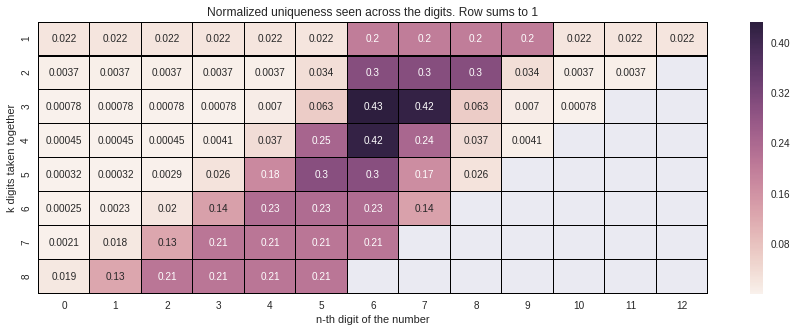

In [131]:
plt.figure(figsize=(15, 5))
sns.heatmap(x, linecolor='black', linewidths=0.1, annot=True)
plt.title('Normalized uniqueness seen across the digits. Row sums to 1')
plt.xlabel('n-th digit of the number')
plt.ylabel('k digits taken together')

# Results
Based on this heatmap we can see that it is the 6, 7, 8, 9 digits which have all the changes. We can then write a function to generate this pattern.